# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: Ali Abbasi
2.   Student Number: 98105879


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
# from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt

from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [2]:
# Change the address as you wish
plays = pd.read_csv('./data/user_artists.dat', sep='\t')
artists = pd.read_csv('./data/artists.dat', sep='\t', usecols=['id', 'name'])

In [3]:
plays.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [4]:
artists.head()

,id,name
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest
3,4,Moi dix Mois
4,5,Bella Morte


# Preprocessing (20 pts)

In [5]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################

ap = pd.merge(plays, artists, left_on='artistID', right_on='id')
ap = ap.sort_values('id')
ap.head()

,userID,artistID,weight,id,name
44425,785,1,76,1,MALICE MIZER
44424,274,1,483,1,MALICE MIZER
44423,34,1,212,1,MALICE MIZER
63519,135,2,1021,2,Diary of Dreams
63520,257,2,152,2,Diary of Dreams


In [6]:
ap

,userID,artistID,weight,id,name
44425,785,1,76,1,MALICE MIZER
44424,274,1,483,1,MALICE MIZER
44423,34,1,212,1,MALICE MIZER
63519,135,2,1021,2,Diary of Dreams
63520,257,2,152,2,Diary of Dreams
...,...,...,...,...,...
77003,454,18741,301,18741,Diamanda Galás
77004,454,18742,294,18742,Aya RL
77005,454,18743,287,18743,Coptic Rain
77006,454,18744,286,18744,Oz Alchemist


In [7]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})

In [8]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################

ap = ap.drop(columns=['id'], errors='ignore').reset_index(drop=True)  # why reset?!
ap.head()

,userID,artistID,playCount,name
0,785,1,76,MALICE MIZER
1,274,1,483,MALICE MIZER
2,34,1,212,MALICE MIZER
3,135,2,1021,Diary of Dreams
4,257,2,152,Diary of Dreams


In [9]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################


artist_rank = ap.groupby('name').apply(lambda df: pd.Series({'totalUniqueUsers': df['userID'].nunique(),
                                                             'totalArtistPlays': df['playCount'].sum()}))

artist_rank['avgUserPlays'] = artist_rank['totalArtistPlays'] / artist_rank['totalUniqueUsers']
artist_rank = artist_rank.sort_values('totalArtistPlays', ascending=False)
artist_rank.head()

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148


In [10]:
artist_rank

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
Morris,1,1,1.000000
Eddie Kendricks,1,1,1.000000
Excess Pressure,1,1,1.000000


In [11]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################

ap = pd.merge(ap, artist_rank, on='name')
ap.head()

,userID,artistID,playCount,name,totalUniqueUsers,totalArtistPlays,avgUserPlays
0,785,1,76,MALICE MIZER,3,771,257.000000
1,274,1,483,MALICE MIZER,3,771,257.000000
2,34,1,212,MALICE MIZER,3,771,257.000000
3,135,2,1021,Diary of Dreams,12,8012,667.666667
4,257,2,152,Diary of Dreams,12,8012,667.666667


In [12]:
ap.head(20)

,userID,artistID,playCount,name,totalUniqueUsers,totalArtistPlays,avgUserPlays
0,785,1,76,MALICE MIZER,3,771,257.000000
1,274,1,483,MALICE MIZER,3,771,257.000000
2,34,1,212,MALICE MIZER,3,771,257.000000
3,135,2,1021,Diary of Dreams,12,8012,667.666667
4,257,2,152,Diary of Dreams,12,8012,667.666667
5,325,2,3466,Diary of Dreams,12,8012,667.666667
6,397,2,56,Diary of Dreams,12,8012,667.666667
7,560,2,134,Diary of Dreams,12,8012,667.666667
8,580,2,803,Diary of Dreams,12,8012,667.666667
9,1551,2,868,Diary of Dreams,12,8012,667.666667


# Exploration

In [13]:
def bar_chart_int(x, y, x_label, y_label, title, caption, total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x[:20], y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100 * (height / total_val)
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center", verticalalignment='bottom', color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20]) * 0.95, caption, horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


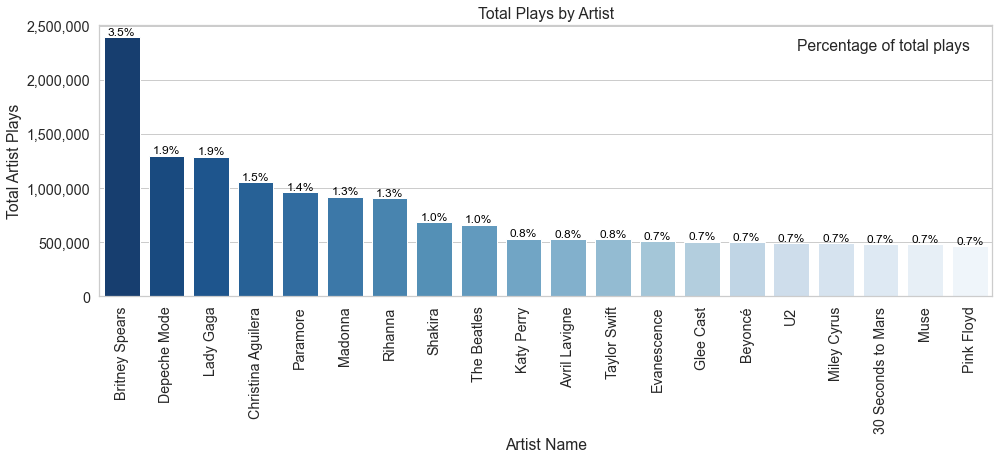

In [14]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x, y, x_label, y_label, title, caption, total_val);

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


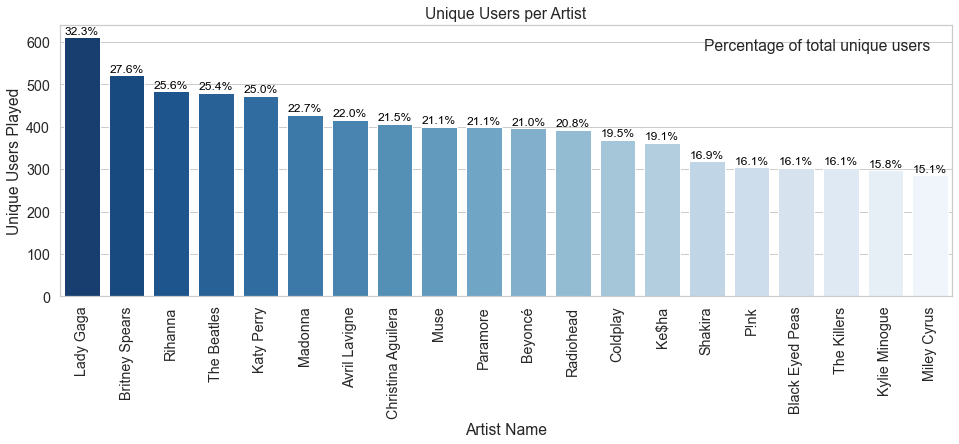

In [15]:
c2 = artist_rank.sort_values(['totalUniqueUsers'], ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x, y, x_label, y_label, title, caption, total_val)

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


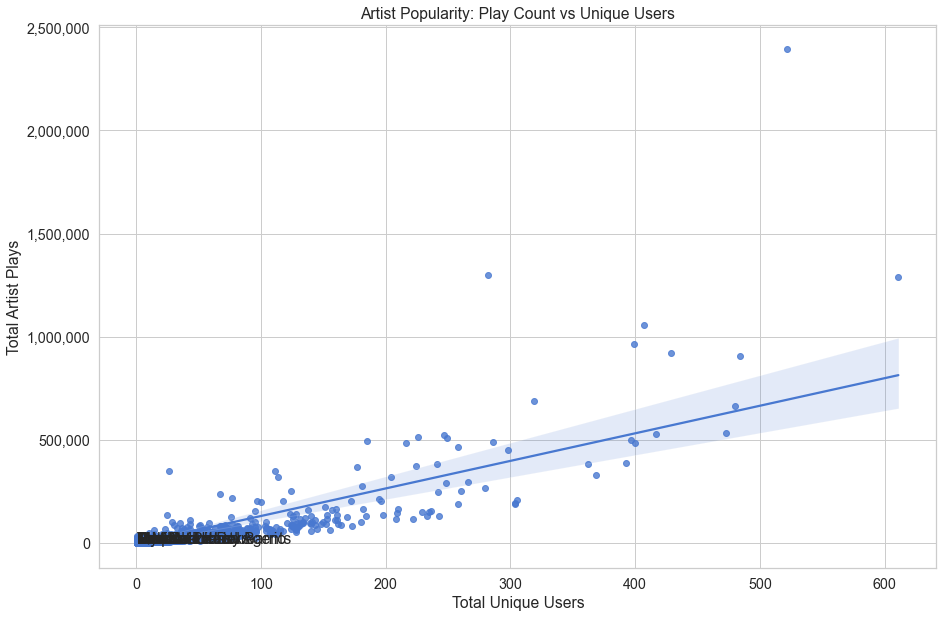

In [16]:
top_artists = artist_rank['totalArtistPlays'].argsort()[::-1][:12]
# TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"

x = artist_rank['totalUniqueUsers'].tolist()  # TODO : "totalUniqueUsers" of "artist_rank"
y = artist_rank['totalArtistPlays'].tolist()  # TODO :  "totalArtistPlays" of "artist_rank"
labels = artist_rank.index  # TODO : index of "artist_rank"

fig, ax = plt.subplots(figsize=(15, 10))
sns.regplot(x, y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t, (x[i], y[i]))

# Preprocessing (30 pts)

In [17]:
pc = ap.playCount
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)

In [18]:
###############################################################################
## TODO: Create a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################

ratings_df = ap.pivot('userID', 'artistID', 'playCountScaled')
ratings_df.head()

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################


ratings = ratings_df.fillna(0).to_numpy()
ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00115397, ..., 0.        , 0.        ,
        0.        ]])

In [21]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code
print(f'non-zero fraction: {np.count_nonzero(ratings) / ratings.size * 100:0.3f}%')
## END

non-zero fraction: 0.276%


# Fitting(Training) Model (50pts)

In [22]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15


###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################


def train_test_split(ratings):
    mask = ratings != 0
    # mask *= mask.sum(axis=1, keepdims=True) > MIN_USER_RATINGS
    for user_mask in mask:
        if user_mask.sum() > MIN_USER_RATINGS:
            idx = np.where(user_mask)[0]
            sampled_idx = np.random.choice(idx, size=DELETE_RATING_COUNT)
            user_mask[sampled_idx] = False
    train = ratings * mask
    validation = ratings * ~mask
    # TODO
    return train, validation

In [23]:
train, val = train_test_split(ratings)

In [24]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################

def rmse(prediction, ground_truth):
    idx = np.where(ground_truth != 0)
    # ground_truth = ground_truth
    return sqrt(mean_squared_error(prediction[idx], ground_truth[idx]))

In [43]:
import tqdm

class Recommender:

    def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
        self.n_epochs = n_epochs
        self.n_latent_features = n_latent_features
        self.lmbda = lmbda
        self.learning_rate = learning_rate
        self.P = None  # (NU, d)
        self.Q = None  # (NI, d)
        self.training_losses = []
        self.val_losses = []

    def predictions(self, P, Q):
        #TODO : create the prediction matrix
        return np.matmul(P, Q.T)

    def fit(self, X_train, X_val):
        #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
        #TODO : save the loss on train and validation data in each iteration

        n_users, n_items = X_train.shape
        self.P = np.random.normal(0, 1/self.n_latent_features, (n_users, self.n_latent_features))
        self.Q = np.random.normal(0, 1/self.n_latent_features, (n_items, self.n_latent_features))
        with tqdm.tqdm(range(self.n_epochs)) as pbar:
            for epoch in pbar:
                # training must be done on datapoint that have non-zero ratings
                user_idx, item_idx = np.where(X_train != 0)
                # in np.add.at, results are accumulated for elements that are indexed more than once
                dP = self.learning_rate * (X_train[user_idx, item_idx].reshape(-1, 1) * self.Q[item_idx] - self.lmbda * self.P[user_idx])
                dQ = self.learning_rate * (X_train[user_idx, item_idx].reshape(-1, 1) * self.P[user_idx] - self.lmbda * self.Q[item_idx])
                np.add.at(self.P, user_idx, dP)
                np.add.at(self.Q, item_idx, dQ)
                prediction_matrix = self.predictions(self.P, self.Q)
                self.training_losses.append(rmse(prediction=prediction_matrix, ground_truth=X_train))
                self.val_losses.append(rmse(prediction=prediction_matrix, ground_truth=X_val))
        return self

    def predict(self, X_train, user_index):
        #TODO : return predicted ratings for unobserved values of specific user index
        idx = np.where(X_train[user_index] == 0)[0]
        p = self.P[user_index]
        Q = self.Q[idx]
        return np.matmul(Q, p)

In [53]:
#creating recommender object
recommender = Recommender().fit(train, val)

100%|██████████| 200/200 [01:54<00:00,  1.75it/s]


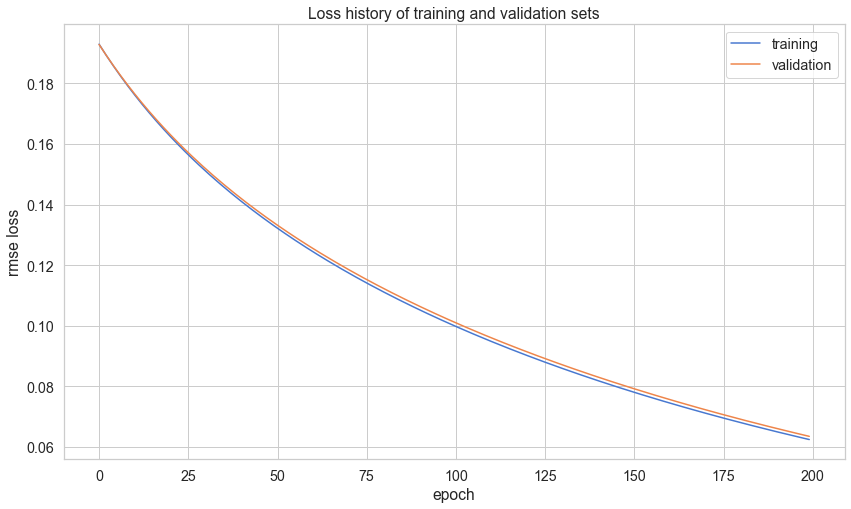

In [54]:
##############################################################################
# TODO : Plot the loss of train and loss
##############################################################################

plt.plot(recommender.training_losses, label='training')
plt.plot(recommender.val_losses, label='validation')
plt.title('Loss history of training and validation sets')
plt.xlabel('epoch')
plt.ylabel('rmse loss')
plt.legend()
plt.show()


# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

Yes. Note that we've not reached a plateau in above learning procedure. One solution would be running it for more epochs. But 200 epochs is too many already! Another good solution is increasing learning rate a little bit:

In [55]:
#creating recommender object
recommender = Recommender(learning_rate=0.02).fit(train, val)

100%|██████████| 200/200 [01:57<00:00,  1.70it/s]


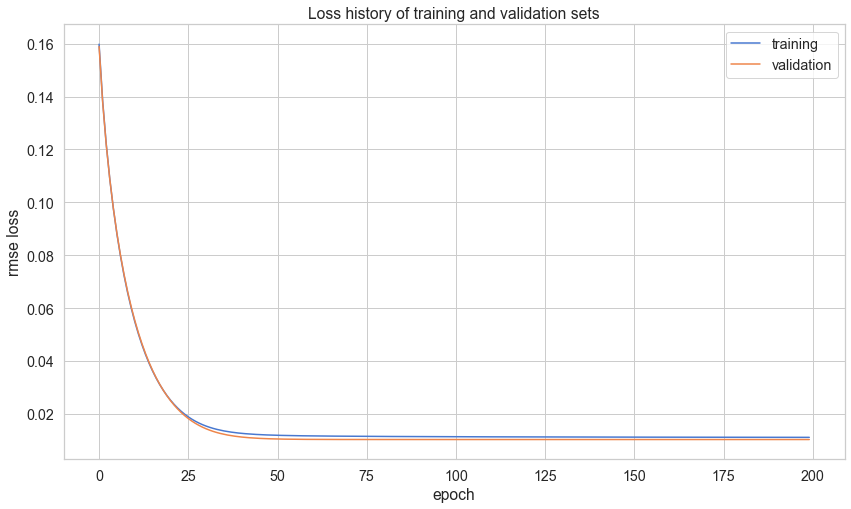

In [65]:
##############################################################################
# TODO : Plot the loss of train and loss
##############################################################################

plt.plot(recommender.training_losses, label='training')
plt.plot(recommender.val_losses, label='validation')
plt.title('Loss history of training and validation sets')
plt.xlabel('epoch')
plt.ylabel('rmse loss')
plt.legend()
plt.show()


In [ ]:
print(f'Final loss on validation set: {recommender.val_losses[-1]}')

As you can see, in just about 50 epochs we've reached to a much better mean squared loss (about 0.01 instead of 0.06).

Another good solution can be using second method mentioned in the paper: Alternating Least Squares:

In [57]:
# fitting via Alternating least squares approach
def fit(self, X_train, X_val):
        n_users, n_items = X_train.shape
        self.P = np.random.normal(0, 1/self.n_latent_features, (n_users, self.n_latent_features))
        self.Q = np.random.normal(0, 1/self.n_latent_features, (n_items, self.n_latent_features))
        with tqdm.tqdm(range(self.n_epochs)) as pbar:
            for epoch in pbar:
                self.P = X_train @ self.Q @ np.linalg.inv(self.Q.T @ self.Q + self.lmbda * np.eye(self.n_latent_features))
                self.Q = X_train.T @ self.P @ np.linalg.inv(self.P.T @ self.P + self.lmbda * np.eye(self.n_latent_features))
                prediction_matrix = self.predictions(self.P, self.Q)
                self.training_losses.append(rmse(prediction=prediction_matrix, ground_truth=X_train))
                self.val_losses.append(rmse(prediction=prediction_matrix, ground_truth=X_val))
        return self

In [58]:
#creating recommender object
als_recommender = Recommender(n_epochs=50)
# changing its fit function
als_recommender.fit = fit
als_recommender.fit(als_recommender, train, val)

100%|██████████| 50/50 [00:21<00:00,  2.30it/s]


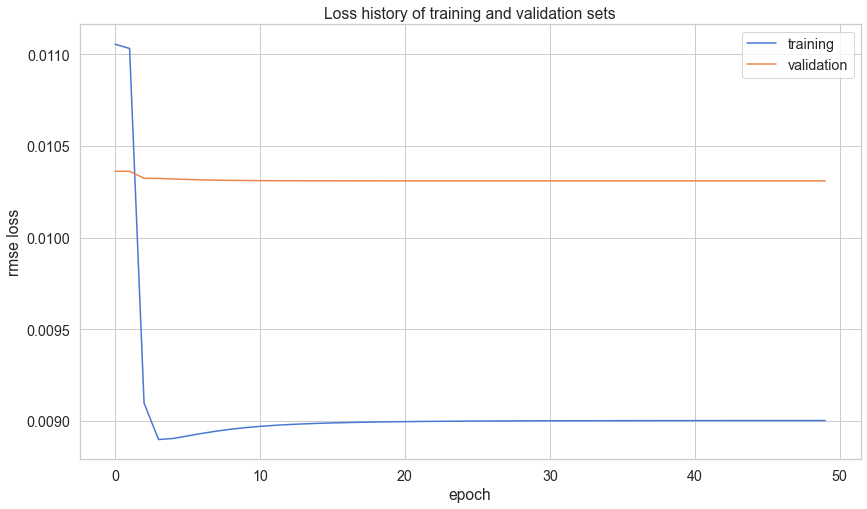

In [59]:
##############################################################################
# TODO : Plot the loss of train and loss
##############################################################################

plt.plot(als_recommender.training_losses, label='training')
plt.plot(als_recommender.val_losses, label='validation')
plt.title('Loss history of training and validation sets')
plt.xlabel('epoch')
plt.ylabel('rmse loss')
plt.legend()
plt.show()


Result from ALS are comparable with results of last part.

# Making recommendations

In [60]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]
rating_predictions = recommender.predict(train, user_index)

In [61]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
    artist_ids = ratings_df.columns[artists_index]
    artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
    top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)

    artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
    # I changed the following line because it was scrambling IDs and Ratings!
    artist_recommendations = pd.merge(top_n_artists, artist_recommendations, left_on='artistId', right_on='id').drop(columns=['artistId'])
    return artist_recommendations.sort_values("rating", ascending=False)

In [62]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

,rating,id,name
0,0.196486,614,Pearl Jam
1,0.052734,1131,Tool
2,0.042016,2172,Gojira
3,0.029742,2479,Twiztid
4,0.025657,1118,A Perfect Circle
5,0.021690,978,Disturbed
6,0.021562,6257,Rob Zombie
7,0.016280,6618,D12
8,0.010990,472,3 Doors Down
9,0.010627,2474,Insane Clown Posse


In [63]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)

,rating,id,name
0,0.003797,15378,The Faders
1,0.003401,6817,Vomitory
2,0.003093,17712,松浦亜弥
3,0.003004,164,יוני בלוך
4,0.002929,12285,XIV Dark Centuries
5,0.002820,12145,Mad Caddies
6,0.002700,10120,E.S.G.
7,0.002688,7087,Maria Cecília e Rodolfo AO VIVO
8,0.002632,16496,Die schwarzen untoten blutgetränkten Waschlappen
9,0.002593,4494,Joe Jackson


# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**